<a href="https://colab.research.google.com/github/rawanaldaneen/pytorch_row/blob/main/neuralNetwork_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [25]:
# craete Model Calss that inhereits nn.Module
class Model(nn.Module):
  # input layer ( 4 features of flower)
  # hidden layer1 (8 neurons)
  # h2 (n)....
  #output layer(3 classes of iris flowers)

  def __init__(self,in_features=4 ,h1=8 ,h2=9 ,out_features=3):
     super().__init__()
     self.f1=nn.Linear(in_features,h1)
     self.f2=nn.Linear(h1,h2)
     self.out=nn.Linear(h2,out_features)

  def forward(self,x):
      x=F.elu(self.f1(x))
      x=F.elu(self.f2(x))
      x=self.out(x)
      return x
# pich a manual seed for a randomzation
torch.manual_seed(41)

# creat an wxample of our model
model=Model()


In [26]:
import pandas as pd
!pip install matplotlib-venn
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
%matplotlib inline

In [27]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)
my_df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [28]:
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)


In [29]:
# train test split x & y
x=my_df.drop('variety',axis=1)
y=my_df['variety']



In [30]:
# convert these to num array
x=x.values
y=y.values


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)


In [33]:
#converst x features to flout tensor
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

In [34]:
# converst y labal to tensors long
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [35]:
#set the criterion of model to measure the error
criterion= nn.CrossEntropyLoss()
#choos adam optimiser
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [36]:
#train our model
# epoch
epochs=100
losses=[]

for i in range(epochs):
  # go forward and get predictions
  y_pred=model.forward(x_train) # get predection result
  # measure the loss error , gona be high at first
  criterion(y_pred,y_train) #predicted value vs y_train

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train
  # keep track our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10==0:
    print(f'epoch: {i} and loss: {loss}')

  # do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch: 0 and loss: 1.1657553911209106
epoch: 10 and loss: 0.9713727831840515
epoch: 20 and loss: 0.5836403369903564
epoch: 30 and loss: 0.3145940601825714
epoch: 40 and loss: 0.1840885430574417
epoch: 50 and loss: 0.0996139794588089
epoch: 60 and loss: 0.059704139828681946
epoch: 70 and loss: 0.04265075922012329
epoch: 80 and loss: 0.03436201810836792
epoch: 90 and loss: 0.029670316725969315


Text(0.5, 0, 'Epochs')

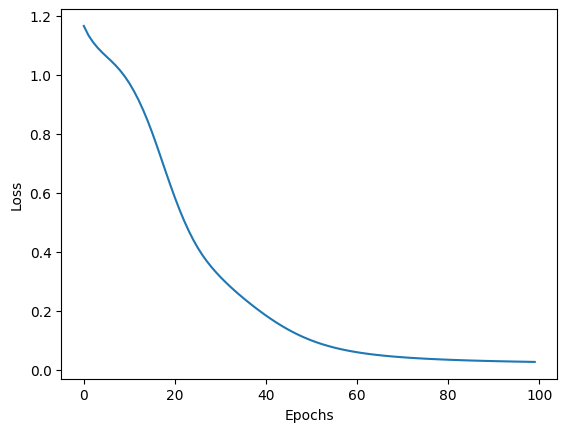

In [37]:
# graph
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [38]:
#evaluate Model using testdata
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=criterion(y_eval,y_test)
  print(f'loss: {loss}')


loss: 0.1383589655160904


In [49]:
# caculate error
correct=0
with torch.no_grad():
  for i, data in enumerate(x_test):

    if y_test[i]==0:
     x='setosa'
    elif y_test[i]==1:
     x='versicolor'

    else:
     x='virginica'

    y_val=model.forward(data)
    # will tell us waht type of flowers our network is
    print(f'{i+1}.) {str(y_val)} \t{ y_test[i] } \t {x} ')

    # correct or not
    if torch.argmax(y_val)==y_test[i]:
      correct+=1

print(f'we got {correct} correct! ')


1.) tensor([-5.8480,  2.9809,  5.8909]) 	2 	 virginica 
2.) tensor([-8.1923,  1.9338, 10.8992]) 	2 	 virginica 
3.) tensor([-8.4035,  2.2194, 10.8230]) 	2 	 virginica 
4.) tensor([-2.7649,  4.5232, -0.8400]) 	1 	 versicolor 
5.) tensor([-7.1178,  2.6268,  8.3158]) 	2 	 virginica 
6.) tensor([-0.7179,  5.4056, -5.1395]) 	1 	 versicolor 
7.) tensor([-5.3724,  3.3693,  4.6442]) 	2 	 virginica 
8.) tensor([-2.5226,  4.6330, -1.3370]) 	1 	 versicolor 
9.) tensor([-6.2470,  2.9897,  6.4999]) 	2 	 virginica 
10.) tensor([-8.6799,  1.8056, 11.8239]) 	2 	 virginica 
11.) tensor([-5.1411,  3.4142,  4.2527]) 	2 	 virginica 
12.) tensor([ 11.1098,   3.3224, -19.9753]) 	0 	 setosa 
13.) tensor([ 10.1173,   3.2887, -18.4825]) 	0 	 setosa 
14.) tensor([ 0.2635,  5.3372, -6.5297]) 	1 	 versicolor 
15.) tensor([  9.5764,   3.7571, -18.3469]) 	0 	 setosa 
16.) tensor([-4.8805,  3.5470,  3.6771]) 	2 	 virginica 
17.) tensor([  9.9525,   3.4808, -18.5187]) 	0 	 setosa 
18.) tensor([-5.7611,  3.0258,  5.71

In [54]:
new_iris=torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([ 10.8234,   3.2365, -19.4354])


In [53]:
new_iriss=torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(new_iriss))

tensor([-6.0639,  2.8664,  6.4046])


In [56]:
# save our model
torch.save(model.state_dict(),'My_firsit_brillient_NN')

In [57]:
# load the model
new_model=Model()
new_model.load_state_dict(torch.load('My_firsit_brillient_NN'))

<All keys matched successfully>

In [58]:
# make sure it's load
new_model.eval()

Model(
  (f1): Linear(in_features=4, out_features=8, bias=True)
  (f2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)